# 0.Импорт библиотек

In [51]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.model_selection import GridSearchCV # грид серч
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline # конвейер обработки

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier



# from sklearn.pipeline import Pipeline # конвейер обработки
# from sklearn.model_selection import GridSearchCV # грид серч
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.naive_bayes import  GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
# from sklearn import metrics
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# from imblearn.over_sampling import SMOTE

# 1.Загрузка Данных

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_4/BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# 2.Исследование данных

In [4]:
df.shape

(10127, 23)

## 2.1. Пропуски

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.isna().any()

CLIENTNUM                                                                                                                             False
Attrition_Flag                                                                                                                        False
Customer_Age                                                                                                                          False
Gender                                                                                                                                False
Dependent_count                                                                                                                       False
Education_Level                                                                                                                       False
Marital_Status                                                                                                                        False
Income_Category     

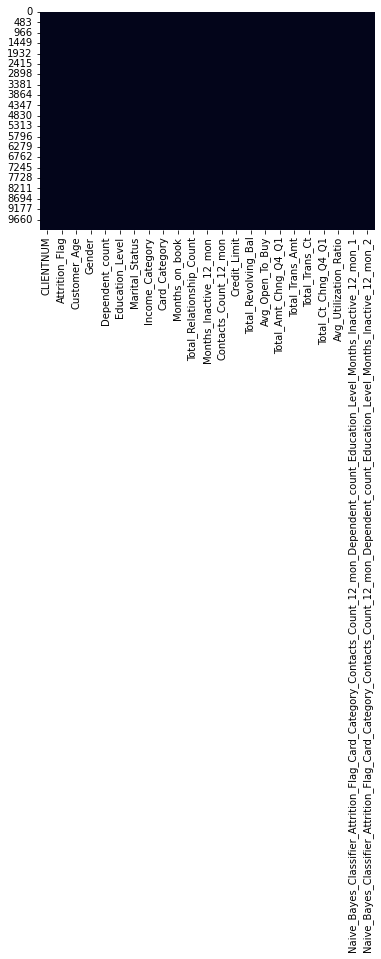

In [7]:
sns.heatmap(df.isna(),cbar=False)

## 2.3.Дубликаты

In [4]:
df.drop_duplicates()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## 2.4. Кодировка данных

In [9]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

## 2.5 Labels


### Баланс в данных

In [10]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Только 19 процентов от всех клиентов это Attired Customer. Данные дисбалансированы

In [11]:
df.Attrition_Flag.value_counts()[1] / df.Attrition_Flag.value_counts()[0] * 100

19.141176470588235

### быстрое перекодирование категориальной целевой на бинарную

In [5]:
d = {'Existing Customer' : 1, 'Attrited Customer' : -1}
df.Attrition_Flag = df.Attrition_Flag.map(d)

In [6]:
df.Attrition_Flag.value_counts()

 1    8500
-1    1627
Name: Attrition_Flag, dtype: int64

In [11]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 2.6 Посмотрю на признаки поподробнее

In [15]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

### CLIENTNUM 

Client number. Unique identifier for the customer holding the account. Думаю можно удалить будет тк смысла нет в этом признаке

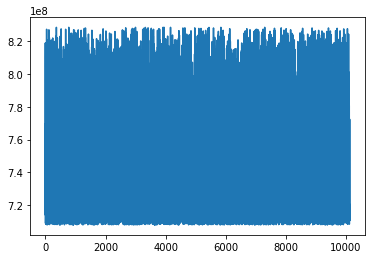

In [16]:
df.CLIENTNUM.plot()

### Months_Inactive_12_mon

No. of months inactive in the last 12 months

Text(0.5, 1.0, 'Количество клиентов \xa0по месяцам неактивности')

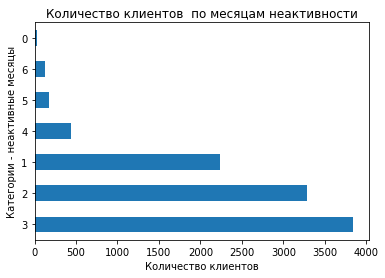

In [17]:
ax = df.Months_Inactive_12_mon.value_counts().plot(kind = 'barh')
ax.set_xlabel('Количество клиентов')
ax.set_ylabel('Категории - неактивные месяцы')
ax.set_title('Количество клиентов  по месяцам неактивности')

### Последние 2 колонки

Тоже выкинуть их

In [18]:
df[df.columns[-2:]]

,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,0.000093,0.999910
1,0.000057,0.999940
2,0.000021,0.999980
3,0.000134,0.999870
4,0.000022,0.999980
...,...,...
10122,0.000191,0.999810
10123,0.995270,0.004729
10124,0.997880,0.002118
10125,0.996710,0.003294


### Дроп колонок

Выкину ненужные колонки, которые определил выше

In [7]:
columns_to_drop = df.columns[-2:].values.tolist()
columns_to_drop

['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [8]:
columns_to_drop.append(df.columns[0])
columns_to_drop

['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
 'CLIENTNUM']

In [9]:
# дропаю колонки
df.drop(columns = columns_to_drop,inplace = True)

In [15]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 2.8 Перекодирование данных

Соберу 2 датафрейма: в одном заменю категориальные типы данных labelencoder'ом, в другом onehoteencoder'ом.

Labelencoded dataframe буду использовать для визуализации данных, а так же протестирую где будет лучше результат из этих 2 датафреймов.

Типы объектов у нас в датафрейме

In [23]:
df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [24]:
df.Attrition_Flag.dtypes

dtype('int64')

In [25]:
df.Customer_Age.dtypes

dtype('int64')

Выделю категориальные признаки в отдельный датафрейм без нашей целевой колонки  Attrition_Flag

In [10]:
categorical_features_df = df.select_dtypes(include = 'O')
categorical_features_df

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...
10122,M,Graduate,Single,$40K - $60K,Blue
10123,M,Unknown,Divorced,$40K - $60K,Blue
10124,F,High School,Married,Less than $40K,Blue
10125,M,Graduate,Unknown,$40K - $60K,Blue


Выделю числовые признаки в отдельный датафрейм

In [11]:
numerical_features_df = df.select_dtypes(exclude = 'O')
numerical_features_df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,-1,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,-1,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,-1,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### OneHotEncoder - Категориальные

In [12]:
# инициализация encodera
encoder = OneHotEncoder()

#перекодирую категориальные
onehot_categorical_features = encoder.fit_transform(categorical_features_df)

In [13]:
# названия получившихся колонок после перекодирования
columns_of_encoded_categorical_features = encoder.get_feature_names_out()
columns_of_encoded_categorical_features

array(['Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'], dtype=object)

In [14]:
# преобразования из sparse matrix в dataframe перекодированных категориальных данных
onehot_categorical_features_df = pd.DataFrame.sparse.from_spmatrix(data = onehot_categorical_features,
                                                           columns = columns_of_encoded_categorical_features)

onehot_categorical_features_df

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### LabelEncoder - Категориальные

In [15]:
label_categorical_feature_df = categorical_features_df.copy()

encoder = LabelEncoder()

for column in categorical_features_df.columns:
  label_categorical_feature_df[column] = encoder.fit_transform(label_categorical_feature_df[column])

label_categorical_feature_df

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,3,1,2,0
1,0,2,2,4,0
2,1,2,1,3,0
3,0,3,3,4,0
4,1,5,1,2,0
...,...,...,...,...,...
10122,1,2,2,1,0
10123,1,6,0,1,0
10124,0,3,1,4,0
10125,1,2,3,1,0


### Пересобираю датафрейм OneHot_Categorical

In [16]:
# конкатенирую 2 датафрейма по столбцам
onehot_df = pd.concat([numerical_features_df, onehot_categorical_features_df],axis = 1)
onehot_df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,40,4,34,3,4,1,3313.0,2517,796.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,40,3,2,3,4003.0,1851,2152.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,-1,41,2,25,4,2,3,4277.0,2186,2091.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,-1,44,1,36,5,3,4,5409.0,0,5409.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,-1,30,2,36,4,3,3,5281.0,0,5281.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Пересобираю датафрейм LabelEncoded_Categorical

In [17]:
# конкатенирую 3 датафрейма по столбцам
label_df = pd.concat([numerical_features_df, label_categorical_feature_df],axis = 1)
label_df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,3,1,2,0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,2,2,4,0
2,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,2,1,3,0
3,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,3,3,4,0
4,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,2,2,1,0
10123,-1,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,6,0,1,0
10124,-1,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,3,1,4,0
10125,-1,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,2,3,1,0


Размерности датафреймов

In [18]:
print(f'original df : {df.shape}')
print(f'onehot : {onehot_df.shape}')
print(f'labelencoded : {label_df.shape}')

original df : (10127, 20)
onehot : (10127, 38)
labelencoded : (10127, 20)


## 2.7. Визуализация

### 2.7.1 plot

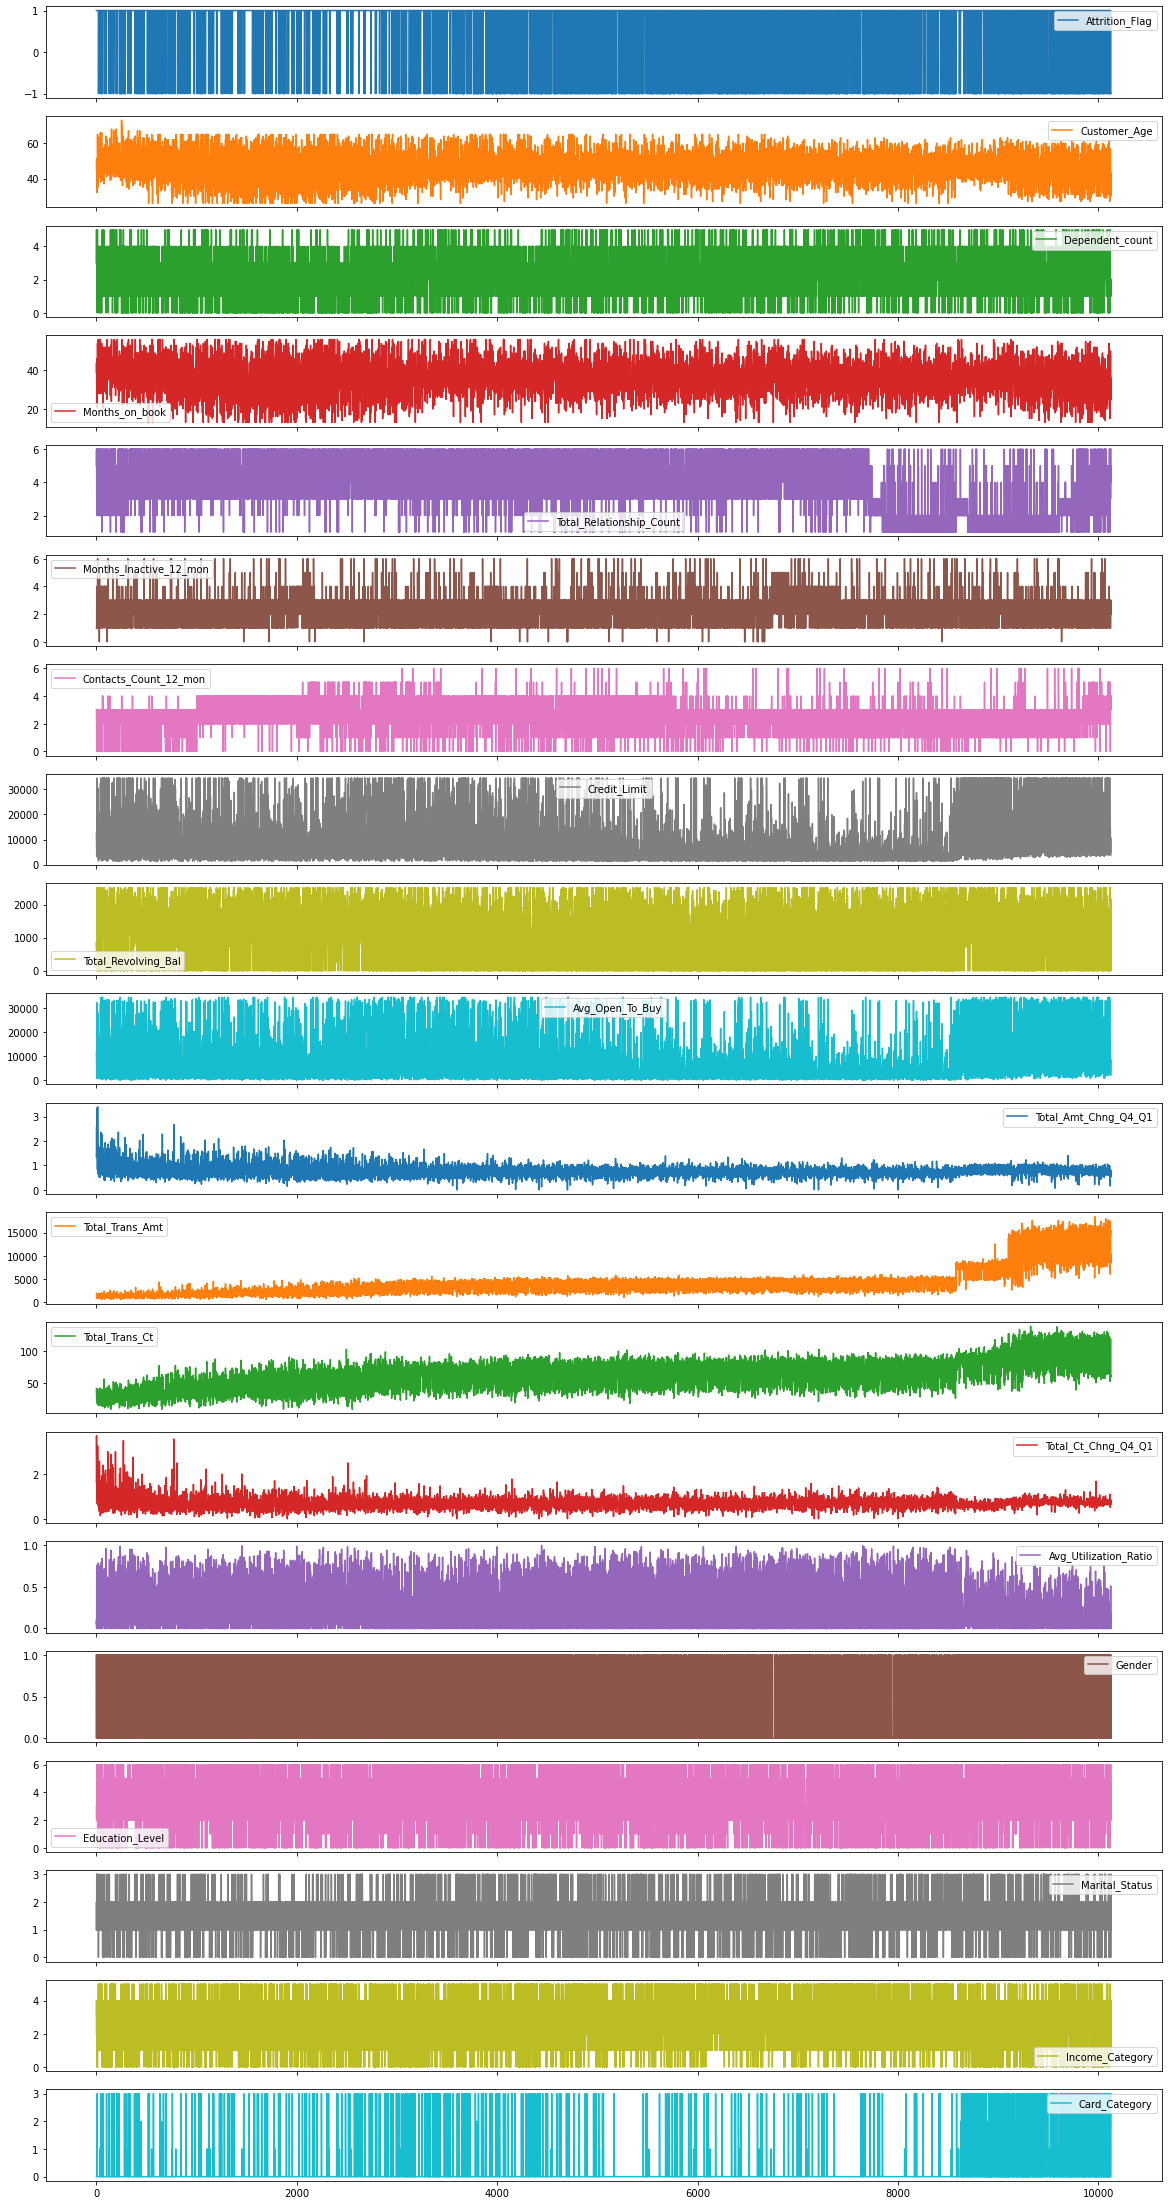

In [35]:
label_df.plot(subplots=True, figsize = (20, 40))
None # убрать вывод ненужный

### 2.7.2. Гистограммы

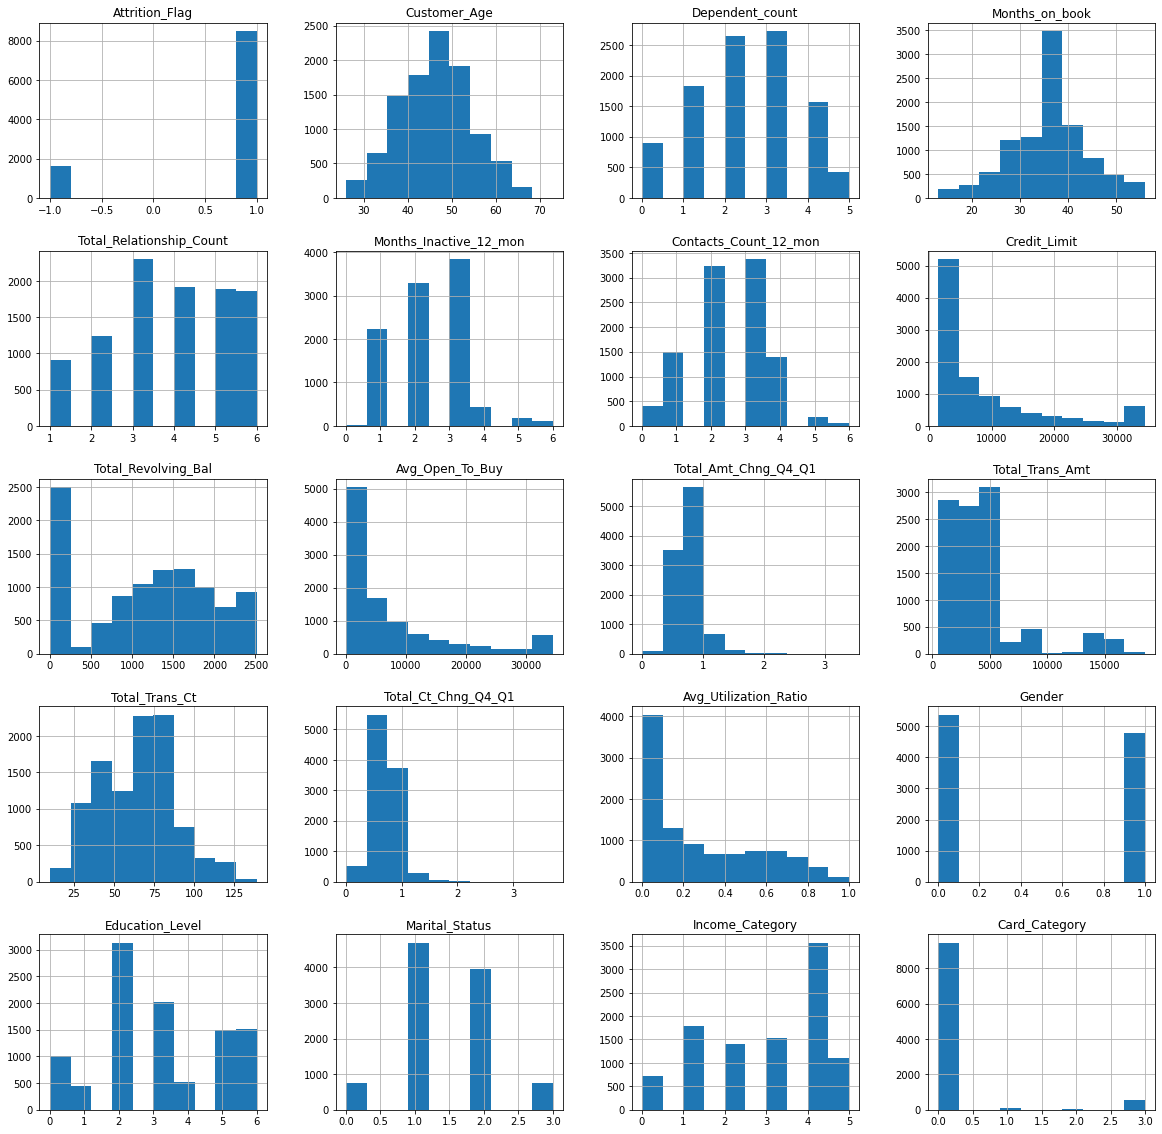

In [36]:
label_df.hist(figsize = (20,20))
None # убрать вывод ненужный

### 2.7.4. Pairplot

In [37]:
sns.pairplot(label_df,corner=True)

Output hidden; open in https://colab.research.google.com to view.

### 2.7.7. Boxplot

Посмотрю на интересные зависимости между признаками

In [38]:
label_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

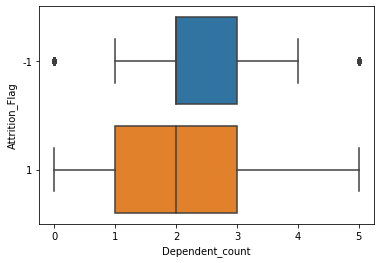

In [39]:
sns.boxplot(y="Attrition_Flag", x="Dependent_count", data=df, orient="h")

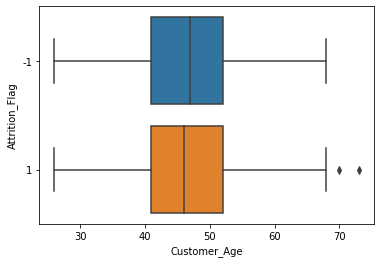

In [40]:
sns.boxplot(y="Attrition_Flag", x="Customer_Age", data=df, orient="h")

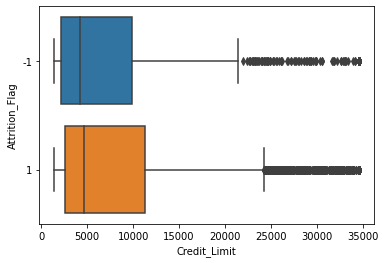

In [41]:
sns.boxplot(y="Attrition_Flag", x="Credit_Limit", data=df, orient="h")

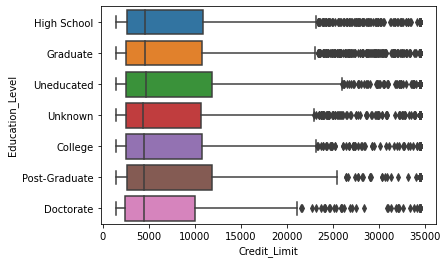

In [42]:
sns.boxplot(y="Education_Level", x="Credit_Limit", data=df, orient="h")

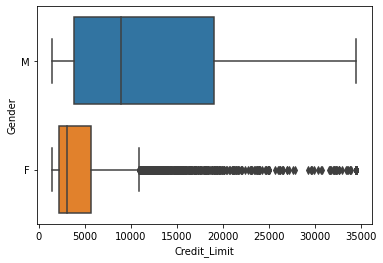

In [43]:
sns.boxplot(y="Gender", x="Credit_Limit", data=df, orient="h")

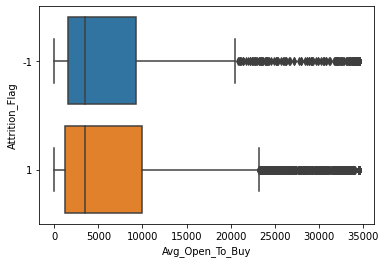

In [44]:
sns.boxplot(y="Attrition_Flag", x="Avg_Open_To_Buy", data=df, orient="h")

### 2.7.8. Матрица корреляций

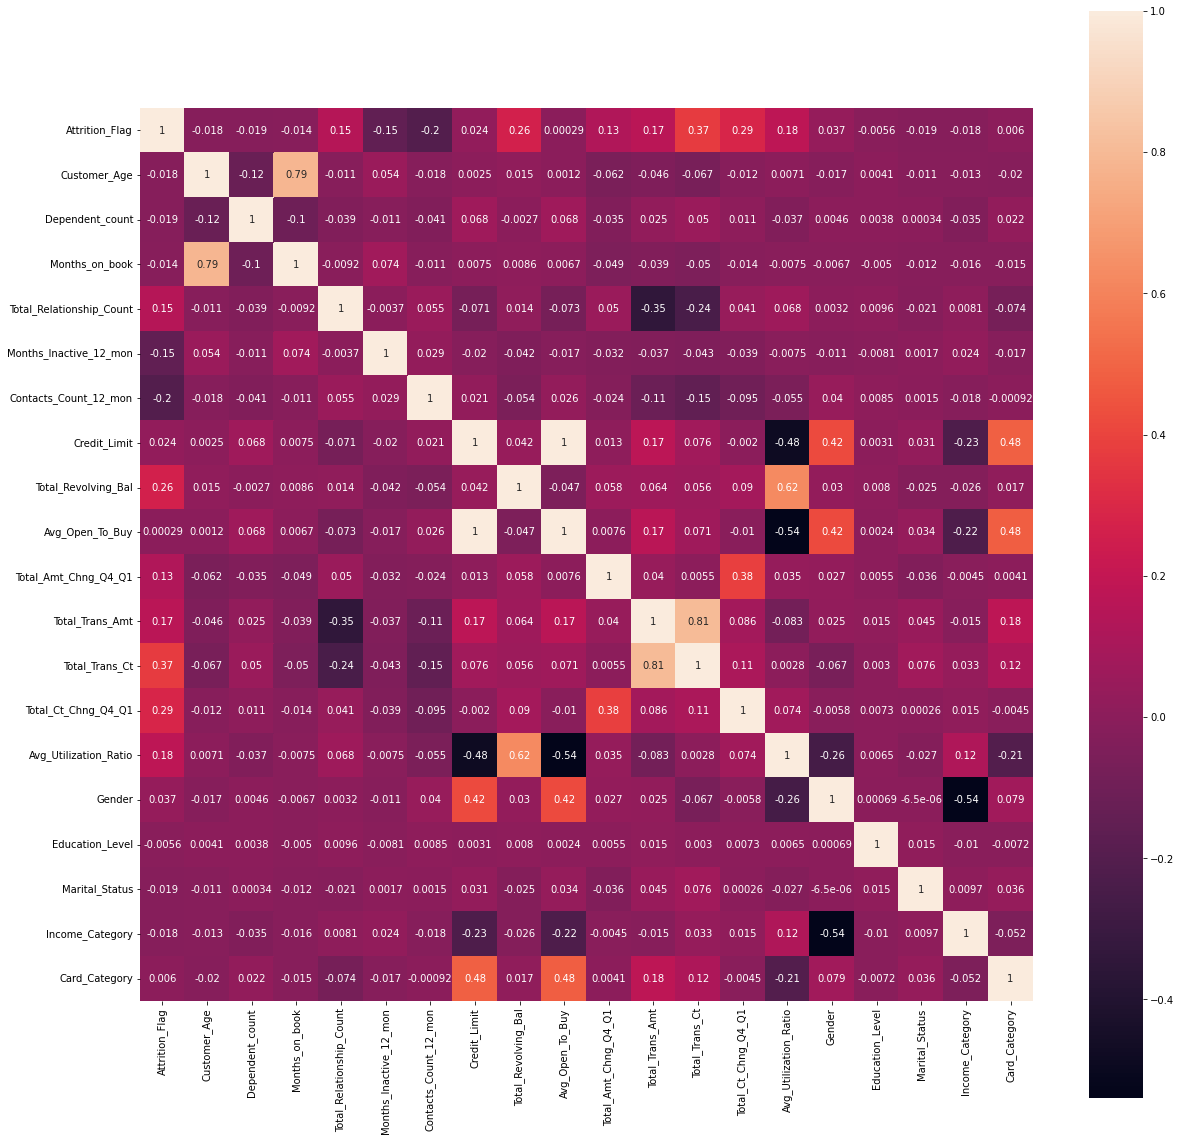

In [45]:
figure(figsize=(20, 20))
sns.heatmap(label_df.corr(),annot=True, square=True)

### 2.7.9.Heatmap

In [46]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

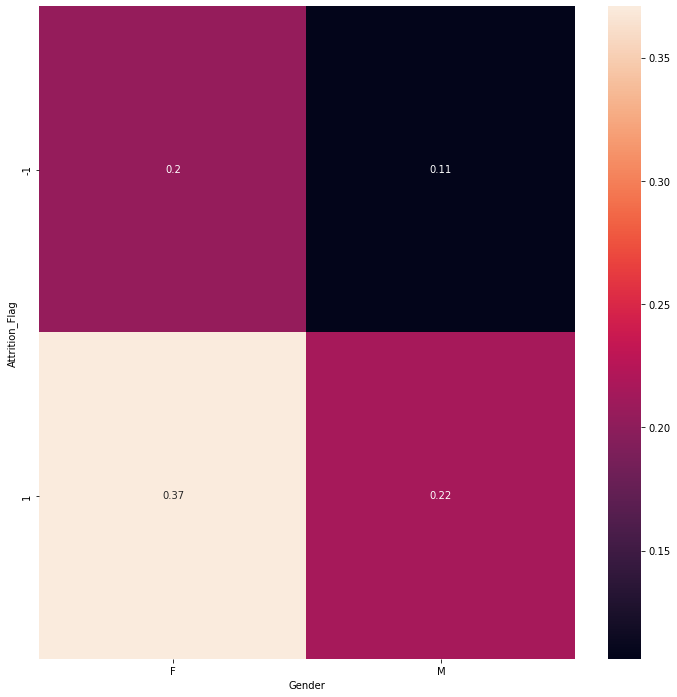

In [47]:
table = df.pivot_table(
                        index='Attrition_Flag', 
                        columns='Gender', 
                        values='Avg_Utilization_Ratio',
                        )

figure(figsize=(12, 12))
sns.heatmap(table, annot=True)

# 3.Предобработка данных

## 3.1. Разбиваем данные на X и y

In [19]:
X_label = label_df[label_df.columns[1:]]
X_label

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,3,1,2,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,2,2,4,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,2,1,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,3,3,4,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,2,2,1,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,6,0,1,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,3,1,4,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,2,3,1,0


In [20]:
X_onehot = onehot_df[onehot_df.columns[1:]]
X_onehot

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
y = label_df.Attrition_Flag.values
y

array([ 1,  1,  1, ..., -1, -1, -1])

## 3.3 Test/Train

In [22]:
#labelencoded
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y, test_size=0.2, stratify = y)
#onehotencoded
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(X_onehot, y, test_size=0.2, stratify = y)

# 4.Алгоритм

## 4.1 AdaBoostClassifier




### 4.1.1 Adaboost с дефолтными параметрами

#### Labelencoded data

In [114]:
abc = AdaBoostClassifier()

In [115]:
abc.fit(X_train_label, y_train_label)
y_pred = abc.predict(X_test_label)

In [116]:
print(classification_report(y_test_label, y_pred))

              precision    recall  f1-score   support

          -1       0.89      0.83      0.86       325
           1       0.97      0.98      0.97      1701

    accuracy                           0.96      2026
   macro avg       0.93      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



Text(0.5, 51.0, 'Predicted value')

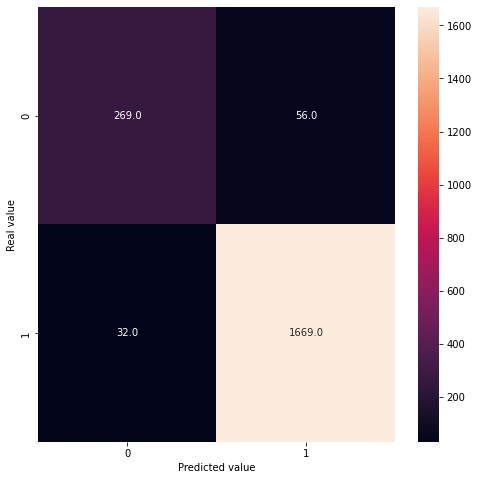

In [117]:
nn_mtx = confusion_matrix(y_test_label, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'False Positive Rate')

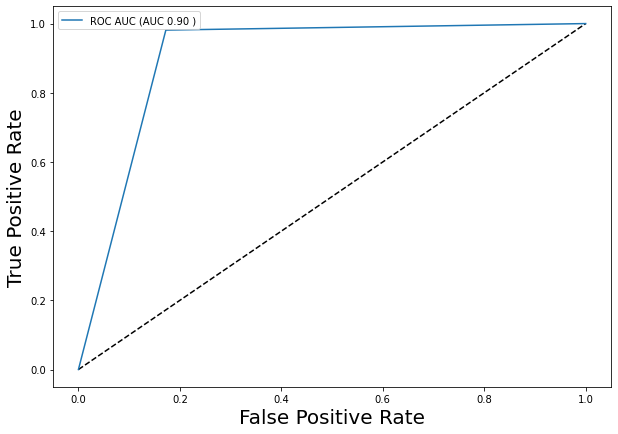

In [134]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_label, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

#### Onehotencoded data

In [135]:
abc = AdaBoostClassifier()

In [136]:
abc.fit(X_train_onehot, y_train_onehot)
y_pred = abc.predict(X_test_onehot)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [137]:
print(classification_report(y_test_onehot, y_pred))

              precision    recall  f1-score   support

          -1       0.92      0.88      0.90       325
           1       0.98      0.98      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



Text(0.5, 51.0, 'Predicted value')

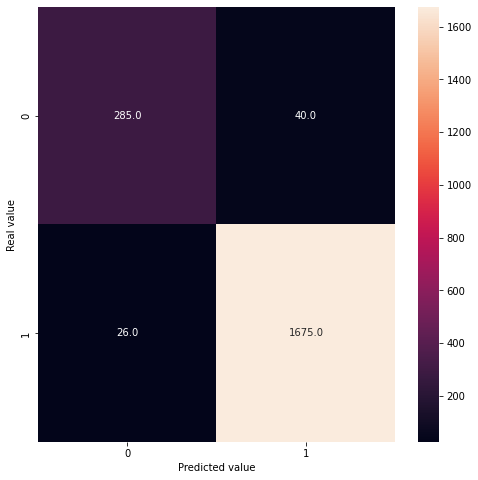

In [138]:
nn_mtx = confusion_matrix(y_test_onehot, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'False Positive Rate')

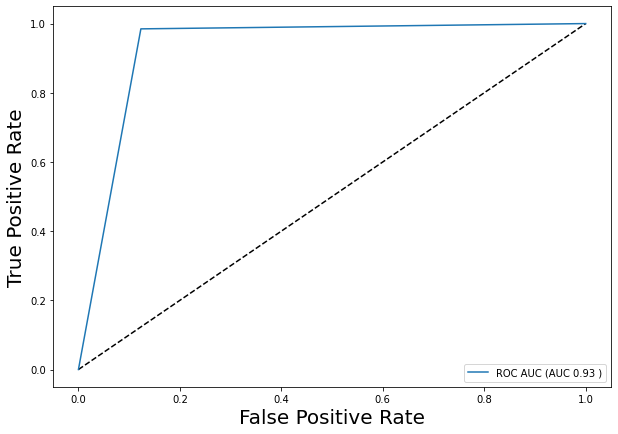

In [140]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_onehot, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

### 4.1.2 Adaboost + gridsearch

Так как onehot encoded dataframe показал себя лучше то для gridsearch возьмем его 

In [239]:
estimators = [
  ('scaler', None),
  ('classifier', AdaBoostClassifier())
]

pipe = Pipeline(estimators)
pipe.named_steps

{'scaler': None, 'classifier': AdaBoostClassifier()}

In [274]:
parameters = {
  'scaler': [StandardScaler()],
  'classifier__n_estimators' : np.arange(1,300,40)
}

In [275]:
grid = GridSearchCV(pipe, parameters, scoring = 'f1_macro', n_jobs = -1, verbose = 3,cv = 5)
grid.fit(X_train_onehot, y_train_onehot)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('classifier', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_estimators': array([  1,  41,  81, 121, 161, 201, 241, 281]),
                         'scaler': [StandardScaler()]},
             scoring='f1_macro', verbose=3)

In [276]:
grid.best_score_

0.9263045244738193

In [277]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', AdaBoostClassifier(n_estimators=201))])

In [278]:
grid.best_params_

{'classifier__n_estimators': 201, 'scaler': StandardScaler()}

In [279]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_estimators,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075163,0.016750,0.009282,0.000532,1,StandardScaler(),"{'classifier__n_estimators': 1, 'scaler': Stan...",0.456223,0.456376,0.456376,0.456376,0.456193,0.456309,0.000083,8
1,0.740508,0.017778,0.039416,0.000732,41,StandardScaler(),"{'classifier__n_estimators': 41, 'scaler': Sta...",0.920888,0.898322,0.895231,0.902332,0.908660,0.905087,0.009088,7
2,1.394213,0.013757,0.072285,0.005969,81,StandardScaler(),"{'classifier__n_estimators': 81, 'scaler': Sta...",0.926115,0.920903,0.914861,0.914377,0.917276,0.918707,0.004365,6
3,2.094107,0.038360,0.101907,0.008710,121,StandardScaler(),"{'classifier__n_estimators': 121, 'scaler': St...",0.932306,0.924490,0.917496,0.917520,0.921627,0.922688,0.005487,5
4,2.749013,0.018894,0.129429,0.004955,161,StandardScaler(),"{'classifier__n_estimators': 161, 'scaler': St...",0.931249,0.923206,0.923822,0.921627,0.924490,0.924879,0.003323,2
5,3.412102,0.039085,0.159204,0.001273,201,StandardScaler(),"{'classifier__n_estimators': 201, 'scaler': St...",0.931869,0.923206,0.929051,0.921627,0.925770,0.926305,0.003749,1
6,4.075033,0.028548,0.191763,0.012090,241,StandardScaler(),"{'classifier__n_estimators': 241, 'scaler': St...",0.929972,0.921130,0.926106,0.922357,0.917017,0.923316,0.004415,3
7,4.601603,0.348793,0.202469,0.029569,281,StandardScaler(),"{'classifier__n_estimators': 281, 'scaler': St...",0.928919,0.917017,0.924568,0.926468,0.919322,0.923259,0.004439,4


In [286]:
y_pred = grid.best_estimator_.predict(X_test_onehot)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [287]:
print(classification_report(y_test_onehot,y_pred))

              precision    recall  f1-score   support

          -1       0.91      0.89      0.90       325
           1       0.98      0.98      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



Confusion matrix

Text(0.5, 51.0, 'Predicted value')

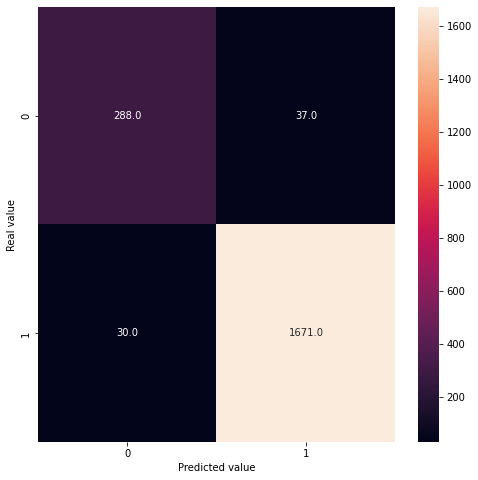

In [288]:
nn_mtx = confusion_matrix(y_test_onehot, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

ROC AUC

Text(0.5, 0, 'False Positive Rate')

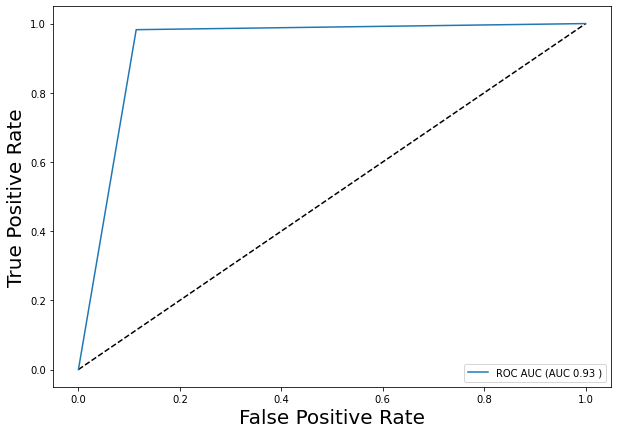

In [289]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_onehot, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

Feature Importances

In [281]:
pd.Series(grid.best_estimator_[1].feature_importances_, index = onehot_df.drop(columns=['Attrition_Flag']).columns).sort_values(ascending=False)

Total_Trans_Amt                   0.323383
Total_Trans_Ct                    0.154229
Total_Amt_Chng_Q4_Q1              0.094527
Avg_Open_To_Buy                   0.074627
Customer_Age                      0.064677
Total_Revolving_Bal               0.039801
Total_Ct_Chng_Q4_Q1               0.039801
Avg_Utilization_Ratio             0.039801
Credit_Limit                      0.034826
Months_on_book                    0.034826
Contacts_Count_12_mon             0.029851
Months_Inactive_12_mon            0.024876
Total_Relationship_Count          0.019900
Marital_Status_Married            0.009950
Education_Level_Post-Graduate     0.004975
Gender_M                          0.004975
Income_Category_$60K - $80K       0.004975
Income_Category_$40K - $60K       0.000000
Income_Category_$80K - $120K      0.000000
Card_Category_Blue                0.000000
Income_Category_Less than $40K    0.000000
Income_Category_Unknown           0.000000
Card_Category_Gold                0.000000
Card_Catego

In [282]:
def plot_feature_importances(gs, column_names, top_n = 15):
    imp = pd.Series(gs.best_estimator_[1].feature_importances_, index = column_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 10))
    plt.title('Важность признаков по Giny Impurity')
    sns.barplot(x = imp.values[:top_n], y = imp.index.values[:top_n], orient='h')

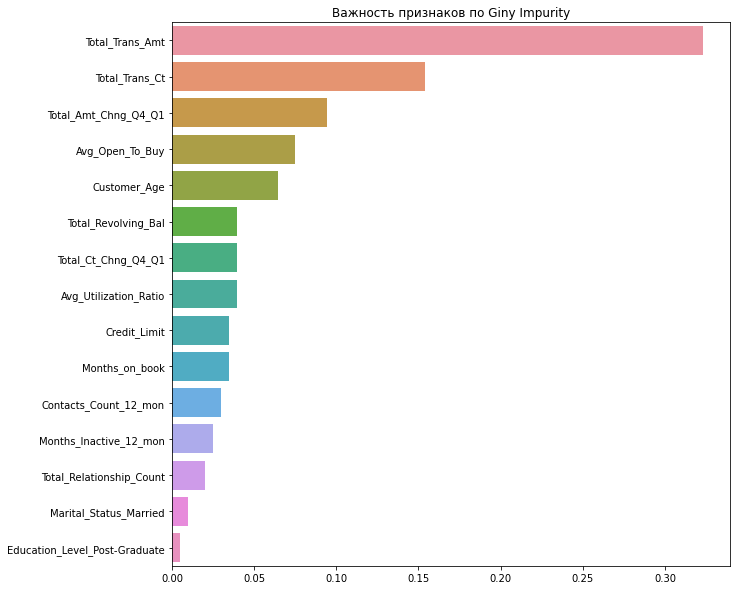

In [283]:
plot_feature_importances(grid, onehot_df.drop(columns=['Attrition_Flag']).columns)

## 4.2 GradienBoosting

### 4.2.1. Sklearn GradBoost

#### 4.2.1.1. Gradboost c дефолтными параметрами

##### Labelencoded data

In [29]:
gbc = GradientBoostingClassifier()

In [30]:
gbc.fit(X_train_label, y_train_label)
y_pred = gbc.predict(X_test_label)

In [31]:
print(classification_report(y_test_label, y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.82      0.88       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.96      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



Text(0.5, 51.0, 'Predicted value')

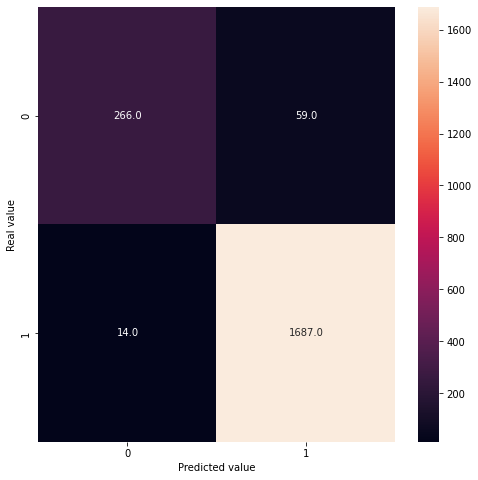

In [32]:
nn_mtx = confusion_matrix(y_test_label, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'False Positive Rate')

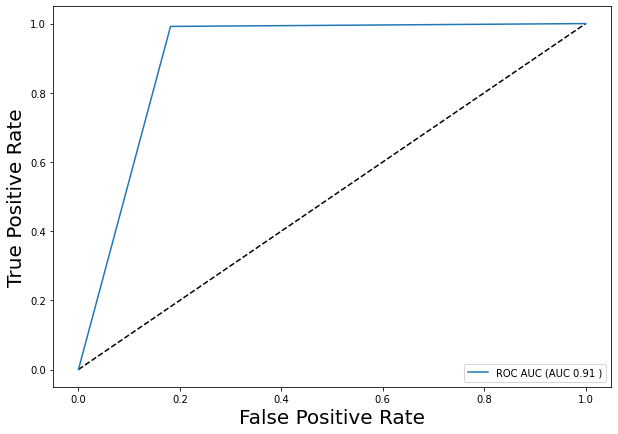

In [33]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_label, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

##### Onehotencoded data

In [34]:
gbc = GradientBoostingClassifier()

In [36]:
gbc.fit(X_train_onehot, y_train_onehot)
y_pred = gbc.predict(X_test_onehot)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [37]:
print(classification_report(y_test_onehot, y_pred))

              precision    recall  f1-score   support

          -1       0.92      0.82      0.87       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



Text(0.5, 51.0, 'Predicted value')

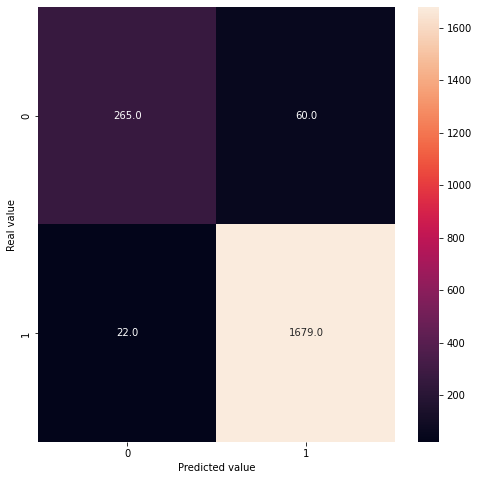

In [38]:
nn_mtx = confusion_matrix(y_test_onehot, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'False Positive Rate')

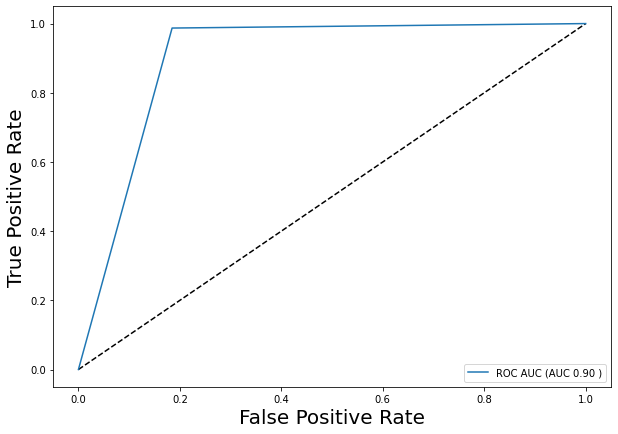

In [39]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_onehot, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

One hot encoded в GradBooste показал себя хуже чем в Adaboost

#### 4.2.1.2 Sklearn Gradboost + gridsearch

Так как **label** encoded dataframe показал себя лучше то для gridsearch возьмем его 

In [22]:
estimators = [
  ('scaler', None),
  ('classifier', GradientBoostingClassifier(n_iter_no_change = 5))
]

pipe = Pipeline(estimators)
pipe.named_steps

{'scaler': None, 'classifier': GradientBoostingClassifier(n_iter_no_change=5)}

In [74]:
parameters = {
  'scaler': [StandardScaler()],
  'classifier__n_estimators' : np.arange(280,320,5),
  'classifier__min_samples_split' : np.arange(2,5,1),
  'classifier__min_samples_leaf' : np.arange(6,12,1),
  'classifier__max_depth' : np.arange(2,8,1)
}

In [75]:
grid = GridSearchCV(pipe, parameters, scoring = 'f1_macro', n_jobs = -1, verbose = 3,cv = 3)
grid.fit(X_train_label, y_train_label)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('classifier',
                                        GradientBoostingClassifier(n_iter_no_change=5))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': array([2, 3, 4, 5, 6, 7]),
                         'classifier__min_samples_leaf': array([ 6,  7,  8,  9, 10, 11]),
                         'classifier__min_samples_split': array([2, 3, 4]),
                         'classifier__n_estimators': array([280, 285, 290, 295, 300, 305, 310, 315]),
                         'scaler': [StandardScaler()]},
             scoring='f1_macro', verbose=3)

In [76]:
grid.best_score_

0.9437623221392611

In [77]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(max_depth=4, min_samples_leaf=9,
                                            n_estimators=280,
                                            n_iter_no_change=5))])

In [78]:
grid.best_params_

{'classifier__max_depth': 4,
 'classifier__min_samples_leaf': 9,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 280,
 'scaler': StandardScaler()}

In [79]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.135427,0.558235,0.016048,0.001630,2,6,2,280,StandardScaler(),"{'classifier__max_depth': 2, 'classifier__min_...",0.939974,0.911031,0.935426,0.928810,0.012708,861
1,3.515600,0.359793,0.017018,0.001162,2,6,2,285,StandardScaler(),"{'classifier__max_depth': 2, 'classifier__min_...",0.943936,0.926465,0.938784,0.936395,0.007330,523
2,3.670420,0.161013,0.017671,0.000522,2,6,2,290,StandardScaler(),"{'classifier__max_depth': 2, 'classifier__min_...",0.948044,0.918680,0.936460,0.934394,0.012076,670
3,3.767901,0.270477,0.017929,0.000729,2,6,2,295,StandardScaler(),"{'classifier__max_depth': 2, 'classifier__min_...",0.943503,0.931395,0.939074,0.937991,0.005002,314
4,3.536484,0.515754,0.017087,0.001294,2,6,2,300,StandardScaler(),"{'classifier__max_depth': 2, 'classifier__min_...",0.942629,0.926610,0.932803,0.934014,0.006595,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,3.230631,0.264097,0.015294,0.000993,7,11,4,295,StandardScaler(),"{'classifier__max_depth': 7, 'classifier__min_...",0.941978,0.928241,0.933726,0.934648,0.005646,657
860,3.440426,0.350952,0.015186,0.000780,7,11,4,300,StandardScaler(),"{'classifier__max_depth': 7, 'classifier__min_...",0.946328,0.929374,0.937849,0.937850,0.006921,329
861,3.419083,0.418064,0.013086,0.001040,7,11,4,305,StandardScaler(),"{'classifier__max_depth': 7, 'classifier__min_...",0.942629,0.930054,0.931292,0.934658,0.005659,656
862,3.594543,0.587310,0.012919,0.001394,7,11,4,310,StandardScaler(),"{'classifier__max_depth': 7, 'classifier__min_...",0.943503,0.933359,0.938375,0.938412,0.004141,262


In [80]:
from joblib import dump, load

estimator = grid.best_estimator_
dump(estimator, "/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_4/gs_gradboost.joblib")

['/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_4/gs_gradboost.joblib']

In [ ]:
# можно загружить объект best_estimator_ чтобы потом его использовать и не считать заново gridsearch

# from joblib import dump, load
# estimator = load("/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/3.ML/ДЗ/ДЗ_3/gridsearch_1.joblib")

In [81]:
y_pred = grid.best_estimator_.predict(X_test_label)

In [82]:
print(classification_report(y_test_label,y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.86      0.90       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.96      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



Confusion matrix

Text(0.5, 51.0, 'Predicted value')

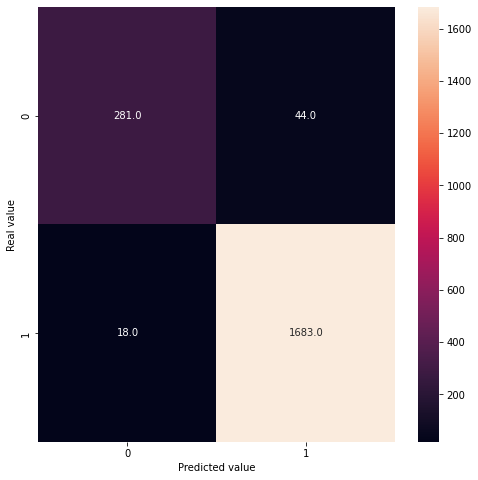

In [86]:
nn_mtx = confusion_matrix(y_test_label, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

ROC AUC

Text(0.5, 0, 'False Positive Rate')

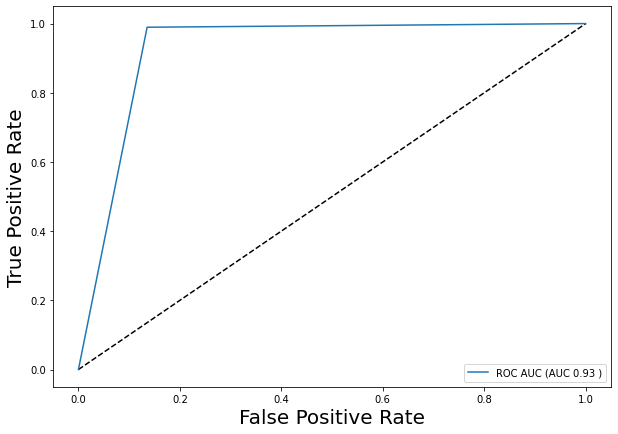

In [85]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_label, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

Feature Importances

In [92]:
pd.Series(grid.best_estimator_[1].feature_importances_, index = label_df.drop(columns=['Attrition_Flag']).columns).sort_values(ascending=False)

Total_Trans_Ct              0.323251
Total_Trans_Amt             0.187791
Total_Revolving_Bal         0.169499
Total_Ct_Chng_Q4_Q1         0.097341
Total_Relationship_Count    0.092542
Total_Amt_Chng_Q4_Q1        0.047316
Customer_Age                0.029819
Months_Inactive_12_mon      0.015729
Contacts_Count_12_mon       0.011483
Avg_Open_To_Buy             0.008936
Credit_Limit                0.003958
Months_on_book              0.003217
Gender                      0.002609
Marital_Status              0.002301
Avg_Utilization_Ratio       0.001935
Dependent_count             0.000845
Education_Level             0.000794
Income_Category             0.000322
Card_Category               0.000313
dtype: float64

In [93]:
def plot_feature_importances(gs, column_names, top_n = 15):
    imp = pd.Series(gs.best_estimator_[1].feature_importances_, index = column_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 10))
    plt.title('Важность признаков по Giny Impurity')
    sns.barplot(x = imp.values[:top_n], y = imp.index.values[:top_n], orient='h')

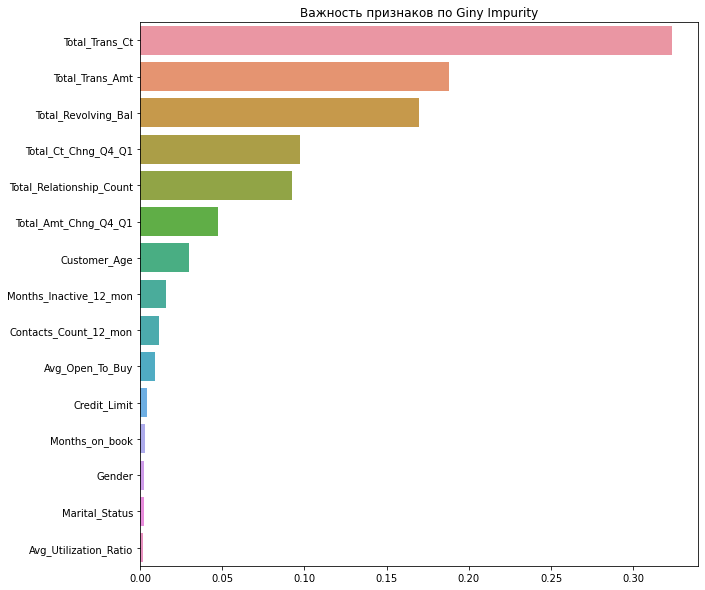

In [95]:
plot_feature_importances(grid, label_df.drop(columns=['Attrition_Flag']).columns)

### 4.2.2.XGBoost

#### 4.2.1.1. XGBoost c дефолтными параметрами

##### Labelencoded data

In [23]:
xgb = XGBClassifier()

In [24]:
xgb.fit(X_train_label, y_train_label)
y_pred = xgb.predict(X_test_label)

In [25]:
print(classification_report(y_test_label, y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.86      0.89       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



Text(0.5, 51.0, 'Predicted value')

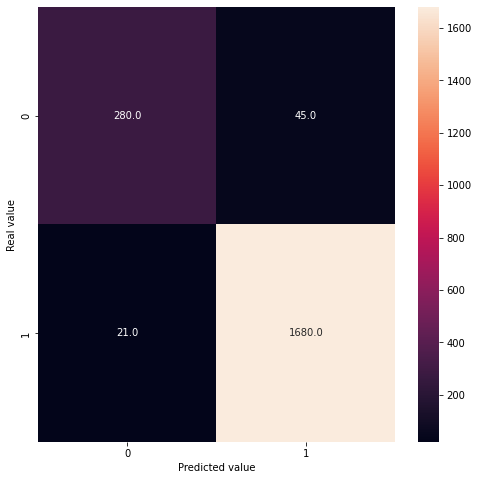

In [26]:
nn_mtx = confusion_matrix(y_test_label, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'False Positive Rate')

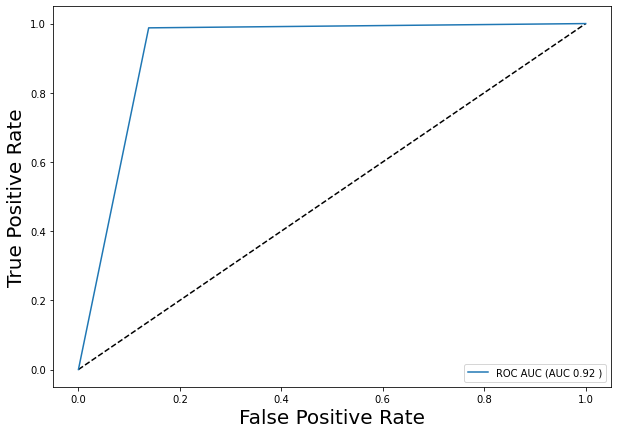

In [27]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_label, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

##### Onehotencoded data

In [28]:
xgb = XGBClassifier()

In [32]:
X_train_label.dtypes

Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Gender                        int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
dtype: object

In [31]:
X_train_onehot.dtypes

Customer_Age                                   int64
Dependent_count                                int64
Months_on_book                                 int64
Total_Relationship_Count                       int64
Months_Inactive_12_mon                         int64
Contacts_Count_12_mon                          int64
Credit_Limit                                 float64
Total_Revolving_Bal                            int64
Avg_Open_To_Buy                              float64
Total_Amt_Chng_Q4_Q1                         float64
Total_Trans_Amt                                int64
Total_Trans_Ct                                 int64
Total_Ct_Chng_Q4_Q1                          float64
Avg_Utilization_Ratio                        float64
Gender_F                          Sparse[float64, 0]
Gender_M                          Sparse[float64, 0]
Education_Level_College           Sparse[float64, 0]
Education_Level_Doctorate         Sparse[float64, 0]
Education_Level_Graduate          Sparse[float

In [50]:
X_train_onehot.values

array([[59.,  0., 40., ...,  0.,  0.,  0.],
       [28.,  1., 36., ...,  0.,  0.,  0.],
       [46.,  3., 27., ...,  0.,  0.,  0.],
       ...,
       [47.,  3., 34., ...,  0.,  0.,  0.],
       [53.,  2., 34., ...,  0.,  0.,  0.],
       [44.,  4., 36., ...,  0.,  0.,  0.]])

In [46]:
xgb.fit(X_train_onehot.values, y_train_onehot) # конвертирую в values иначе xgboost ругается
y_pred = xgb.predict(X_test_onehot.values)

In [47]:
print(classification_report(y_test_onehot, y_pred))

              precision    recall  f1-score   support

          -1       0.89      0.79      0.84       325
           1       0.96      0.98      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.92      0.89      0.90      2026
weighted avg       0.95      0.95      0.95      2026



Text(0.5, 51.0, 'Predicted value')

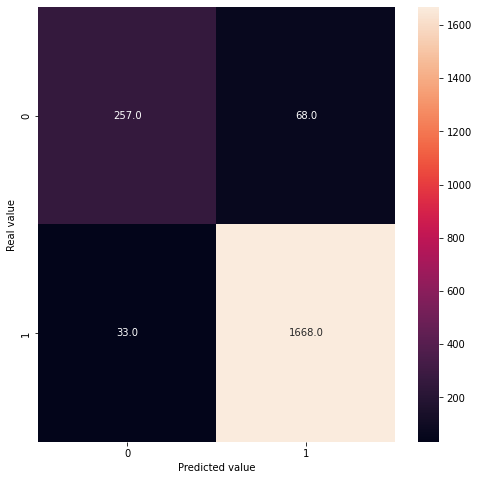

In [48]:
nn_mtx = confusion_matrix(y_test_onehot, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'False Positive Rate')

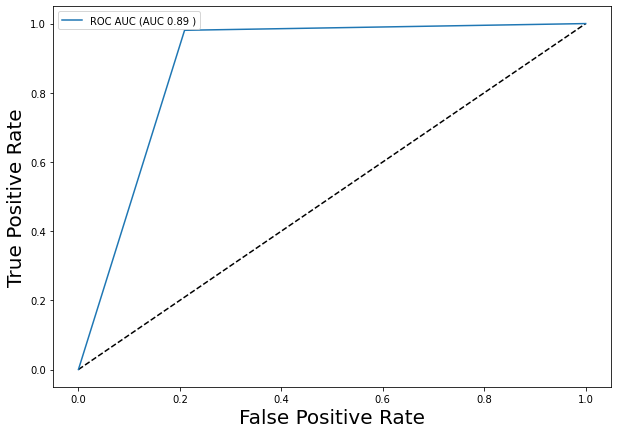

In [49]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_onehot, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

One hot encoded в XGBoost показал себя хуже всего

### 4.2.3.Catboost

#### 4.2.3.1. Catboost с дефолтными параметрами

In [52]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



##### Labelencoded data

In [73]:
cat = CatBoostClassifier()

In [54]:
cat.fit(X_train_label, y_train_label)
y_pred = cat.predict(X_test_label)

Learning rate set to 0.02517
0:	learn: 0.6581338	total: 69.1ms	remaining: 1m 8s
1:	learn: 0.6290642	total: 80.4ms	remaining: 40.1s
2:	learn: 0.5990276	total: 91.6ms	remaining: 30.4s
3:	learn: 0.5738962	total: 102ms	remaining: 25.4s
4:	learn: 0.5498143	total: 108ms	remaining: 21.4s
5:	learn: 0.5262387	total: 118ms	remaining: 19.5s
6:	learn: 0.4999118	total: 124ms	remaining: 17.6s
7:	learn: 0.4819769	total: 131ms	remaining: 16.3s
8:	learn: 0.4649354	total: 136ms	remaining: 15s
9:	learn: 0.4440631	total: 143ms	remaining: 14.1s
10:	learn: 0.4276927	total: 148ms	remaining: 13.3s
11:	learn: 0.4127085	total: 182ms	remaining: 14.9s
12:	learn: 0.3989924	total: 204ms	remaining: 15.5s
13:	learn: 0.3808913	total: 211ms	remaining: 14.8s
14:	learn: 0.3715821	total: 224ms	remaining: 14.7s
15:	learn: 0.3599076	total: 238ms	remaining: 14.6s
16:	learn: 0.3455317	total: 251ms	remaining: 14.5s
17:	learn: 0.3392889	total: 271ms	remaining: 14.8s
18:	learn: 0.3305345	total: 277ms	remaining: 14.3s
19:	learn: 

In [55]:
print(classification_report(y_test_label, y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.88      0.91       325
           1       0.98      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



Text(0.5, 51.0, 'Predicted value')

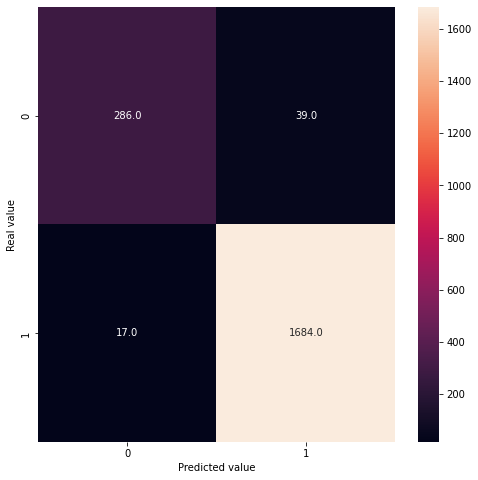

In [56]:
nn_mtx = confusion_matrix(y_test_label, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'False Positive Rate')

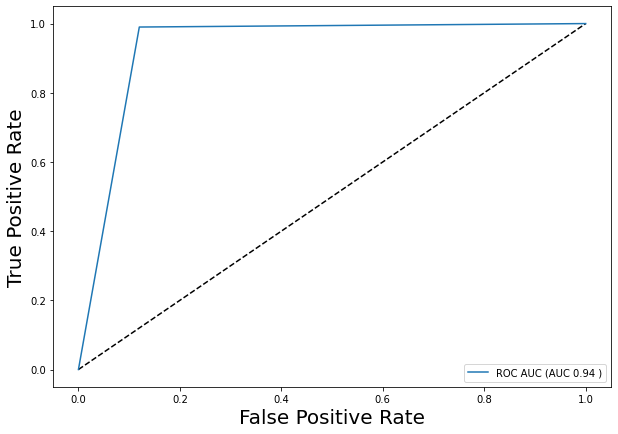

In [57]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_label, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

##### OneHoteencoded data

In [58]:
cat = CatBoostClassifier()

In [65]:
cat.fit(X_train_onehot, y_train_onehot)
y_pred = cat.predict(X_test_onehot)

Learning rate set to 0.02517
0:	learn: 0.6574844	total: 5.1ms	remaining: 5.09s
1:	learn: 0.6278627	total: 10.5ms	remaining: 5.24s
2:	learn: 0.5986556	total: 15.7ms	remaining: 5.22s
3:	learn: 0.5697280	total: 21.2ms	remaining: 5.28s
4:	learn: 0.5453145	total: 26.6ms	remaining: 5.3s
5:	learn: 0.5234028	total: 32ms	remaining: 5.3s
6:	learn: 0.4943599	total: 37.3ms	remaining: 5.29s
7:	learn: 0.4742406	total: 42.4ms	remaining: 5.26s
8:	learn: 0.4545323	total: 47.7ms	remaining: 5.25s
9:	learn: 0.4375331	total: 53.1ms	remaining: 5.26s
10:	learn: 0.4225150	total: 58ms	remaining: 5.22s
11:	learn: 0.4081563	total: 63ms	remaining: 5.19s
12:	learn: 0.3931724	total: 68.4ms	remaining: 5.19s
13:	learn: 0.3795695	total: 73.8ms	remaining: 5.2s
14:	learn: 0.3663280	total: 79.1ms	remaining: 5.19s
15:	learn: 0.3527856	total: 84.4ms	remaining: 5.19s
16:	learn: 0.3428471	total: 89.7ms	remaining: 5.19s
17:	learn: 0.3343042	total: 95.4ms	remaining: 5.2s
18:	learn: 0.3267392	total: 101ms	remaining: 5.19s
19:	l

In [66]:
print(classification_report(y_test_onehot, y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.90      0.91       325
           1       0.98      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



Text(0.5, 51.0, 'Predicted value')

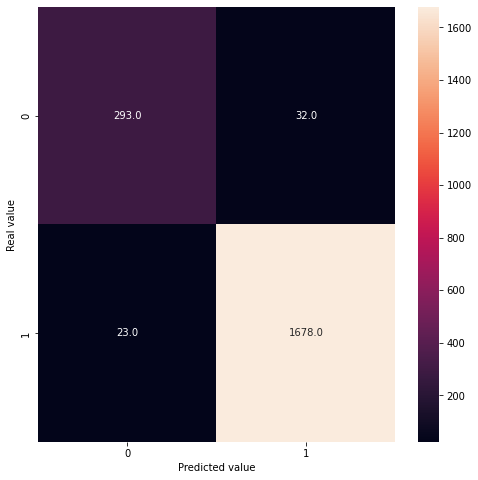

In [67]:
nn_mtx = confusion_matrix(y_test_onehot, y_pred)

fig = plt.figure(figsize=(8,8))
sns.heatmap(nn_mtx, annot=True,fmt=".1f",)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'False Positive Rate')

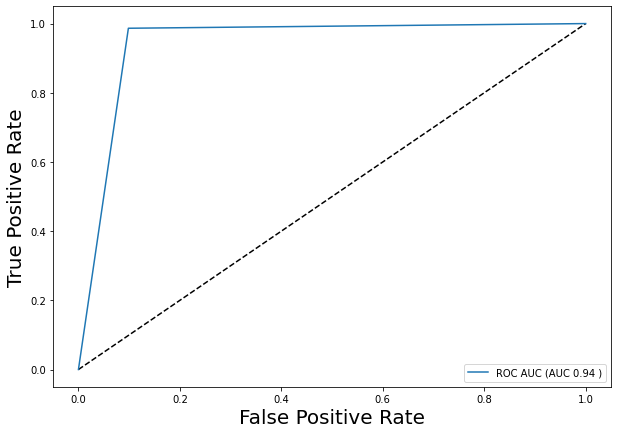

In [68]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
fpr, tpr, _ = roc_curve(y_test_onehot, y_pred)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label =f'ROC AUC (AUC {auc(fpr,tpr):.2f} )' )
plt.legend()
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

# 5.Выводы

GradBoost затюненый от Sklearn отработал примерно так же как и Catboost с дефолтными параметрами. Теоретически можно было бы улучшить результат с Catboost + gridsearch